<a href="https://colab.research.google.com/github/ManavMNair/QuantumComputing/blob/main/Two_Qubit_State_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 1: Two-Qubit State Preparation and Sampling

##Installing required packages

In [ ]:
!pip install qiskit qiskit[visualization] qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.1/125.1 kB 8.8 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=b5d05a9375492479e45b308ef41316e2b7fc59bccba2f661e2fc23e507556ffd
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


In [ ]:
from qiskit import *
import numpy as np



In [ ]:
#Defining amplitudes

a00 = np.sqrt(1/3)
a01 = np.sqrt(1/6)
a10 = np.sqrt(1/6)
a11 = np.sqrt(1/3)


assert np.isclose((abs(a00)**2 + abs(a01)**2 + abs(a10)**2 + abs(a11)**2),1.0),"Not normalized"

##Qubit initialization

In [ ]:
qc = QuantumCircuit(2,2)

qc.initialize([a00, a01, a10, a11], [1,0])

#Visualizing the circuit

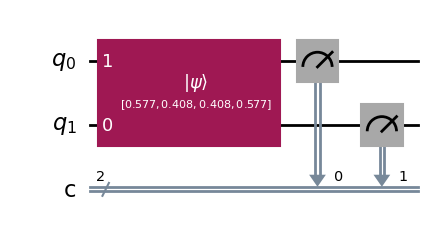

In [ ]:
qc.measure(0,0)
qc.measure(1,1)
qc.draw("mpl")

##Circuit Simulation

Counts = {'01 01': 175, '10 10': 165, '00 00': 349, '11 11': 335}

Empirical P(0) = 0.3271484375
Empirical P(1) = 0.1611328125
Empirical P(2) = 0.1708984375
Empirical P(3) = 0.3408203125


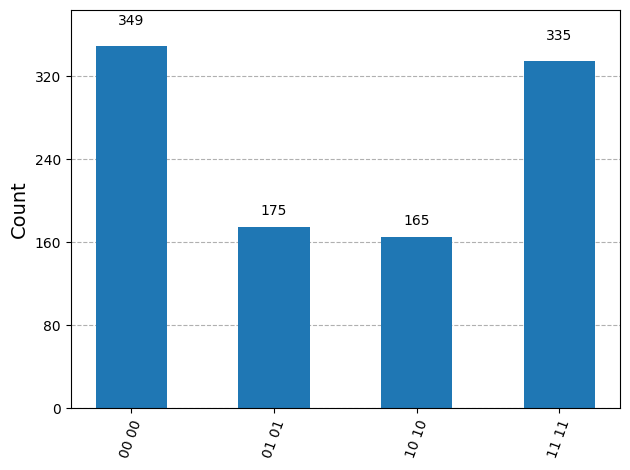

In [ ]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

simulator = AerSimulator()

compiled_circuit = transpile(qc, simulator)
compiled_circuit.measure_all()
result = simulator.run(compiled_circuit, shots = 1024).result()


#Record the counts for ’00’, ’01’, ’10’, ’11’.
counts = result.get_counts(compiled_circuit)
print(f"Counts = {counts}\n")

#Calculate probabilities by dividing each count by 1024.
print(f"Empirical P(0) = {counts.get('11 11',0)/1024}")
print(f"Empirical P(1) = {counts.get('10 10',0)/1024}")
print(f"Empirical P(2) = {counts.get('01 01',0)/1024}")
print(f"Empirical P(3) = {counts.get('00 00',0)/1024}")

plot_histogram(counts)


